# Conveyor Belt TI - scheme

In [1]:
import os, sys
sys.path.append(os.getcwd()+"/..")

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import colorbar
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
os.getcwd()

'/home/dahahn/projects/K_ENSEMBLER/Ensembler/examples'

In [2]:
import ensembler.potentials.OneD as pot
import ensembler.system.perturbed_system as system
import ensembler.ensemble.replicas_dynamic_parameters as cvb
from ensembler.samplers import stochastic

## Interactive Example

In [3]:
from ensembler.visualisation.interactive_plots import interactive_conveyor_belt

iwidget = interactive_conveyor_belt(nbins=10, numsys=3, steps=10)

## Build Conveyor Belt

In [4]:
numsys = 8
steps = 10

sampler = stochastic.metropolisMonteCarloIntegrator()
potential = pot.linearCoupledPotentials()
syst = system.perturbedSystem(potential=potential , 
                              sampler=sampler)

In [5]:
ensemble = cvb.conveyorBelt(0.0, numsys, system=syst, build=False)
ensemble

0.0      0.00    24.081
1.0      0.79   213.216
2.0      1.57   402.350
3.0      2.36   591.484
4.0      3.14   780.618
5.0      3.93   969.753
6.0      4.71  1158.887
7.0      5.50  1348.021

In [7]:
#ens.traj_clear()
ensemble.simulate(steps)

print(ensemble.reject)



4


In [8]:
(cvb_traj, systrajs) = ensemble.get_trajs()

In [9]:
systrajs[0].head()

,position,temperature,total_system_energy,total_potential_energy,total_kinetic_energy,dhdpos,velocity,lam,dhdlam
0,6.93993,298.0,144.487923,144.487923,NaN,41.6396,NaN,0.000000,240.813205
1,5.9273704676818895,298.0,17.566860,17.566860,NaN,-1.0125604362097818,NaN,0.000000,175.668603
2,2.2742288639020076,298.0,2.586058,2.586058,NaN,-3.653141603779882,NaN,0.000000,25.860585
3,0.07554803403277743,298.0,0.003875,0.003875,NaN,-2.19868082986923,NaN,0.035802,0.028538
4,-2.021130041408505,298.0,2.773726,2.773726,NaN,-2.0966780754412824,NaN,0.035802,20.424833


In [10]:
cvb_traj.head()

,Step,capital_lambda,TotE,biasE,doAccept
0,1,6.170711,170.895056,170.895056,True
1,2,0.462856,13.849356,13.849356,True
2,3,0.462856,11.664754,0.000000,False
3,4,0.849237,9.065114,9.065114,True
4,5,0.849237,4.822637,0.000000,False


### Plot Simulation

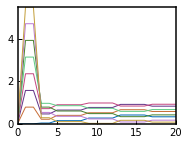

In [17]:
for i in systrajs:
    plt.plot(systrajs[i].index, systrajs[i].lam)

In [12]:
nbins=100
bins=np.zeros(nbins)
dhdlbins=np.zeros(nbins)
for i in systrajs:
    for j in range(systrajs[i].shape[0]):
        index=int(np.floor(systrajs[i].lam[j]*nbins))
        print(index)
        if index == nbins:
            index=nbins-1
        bins[index]+=1
        dhdlbins[index]+=systrajs[i].dhdlam[j]
dhdlbins/=bins
#dhdlbins

0
0
0
3
3
14
14
14
14
27
27
27
27
41
41
41
41
32
32
32
32
0
78
78
21
21
39
39
39
39
52
52
52
52
66
66
66
66
57
57
57
57
0
157


IndexError: index 157 is out of bounds for axis 0 with size 100

Integral =  12.182148398671162


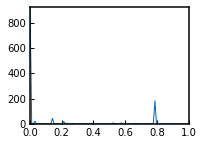

In [18]:
plt.plot(np.linspace(0,1,nbins), dhdlbins)
integral=np.sum(dhdlbins)*1.0/nbins
print('Integral = ', integral)

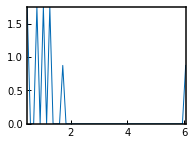

In [19]:
h1=np.histogram(cvb_traj.capital_lambda, bins=50, density=1)
plt.plot(h1[1][:-1], h1[0])
#plt.ylim(0.14, 0.185)

Text(0, 0.5, '$\\lambda$')

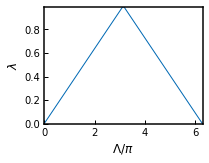

In [22]:
caplam = np.linspace(0, 2*np.pi, 100)
x=[]
for i in caplam:
    x.append(ensemble.calculate_replica_lambda(i, 0))
plt.plot(caplam, x)
plt.xlabel('$\Lambda / \pi$')
plt.ylabel('$\lambda$')

In [23]:
#analytical
u=1.66053886e-27
NA=6.0221415e23
hbar=1.054571800e-34*1e12*1e-3*NA  #kJ/mol*ps
R=0.00831446 #kJ/mol/K
mu=0.5  #u
T=300.0  #K
fc1=1  #kJ/nm^2/mol
fc2=11.0 #kJ/nm^2/mol
omega1=np.sqrt(fc1/mu)
omega2=np.sqrt(fc2/mu)
print('Omega', omega1, omega2)
alpha1=hbar*np.sqrt(fc1/mu)/(R*T)
alpha2=hbar*np.sqrt(fc2/mu)/(R*T)
print(alpha1, alpha2)
Z1=np.exp(-alpha1/2.0)/(1-np.exp(-alpha1))
Z2=np.exp(-alpha2/2.0)/(1-np.exp(-alpha2))
F1=-R*T*np.log(Z1)
F2=-R*T*np.log(Z2)
DF=F2-F1
DF2=-R*T*np.log(Z2/Z1)
print(DF, DF2, F1, F2)

Omega 1.4142135623730951 4.69041575982343
0.03600698886161772 0.11942167188449208
2.991927940369414 2.991927940369415 -8.291150088634001 -5.299222148264588


## Conveyor Belt Animation

In [25]:
import ensembler.visualisation.plotConveyorBelt as plotEnsembler
nbins=2
dhdlbins=2
lam = np.linspace(0, 1, nbins)
ene = np.cumsum(dhdlbins)/nbins

fig = plotEnsembler(lam, ene, CapLam=0.2, M=8)

TypeError: 'module' object is not callable